### Problema de clustering
En base al set de datos “wine_set.csv” realizar las siguientes tareas que comprenden un proyecto de problema de clustering:
1.	Chequear si en la base existen datos nulos.
2.	Chequear por outliers, en caso de que los haya, excluirlos.
3.	Realizar análisis exploratorio de datos (EDA).
4.	Estandarizar las variables.
5.	Separar en subconjuntos de entrenamiento y de prueba.
6.	Entrenar el o los modelos de clustering elegidos. 
7.	Exponer los resultados del modelo. 
8.	Exponer el modelo y los hiper-parámetros utilizados describiendo porque cree que son los mejores para el problema.
### Datos
- Alcohol: Alcohol
- Malic acid: Ácido málico
- Ash: madera
- Alcalinity of ash: Alcalinidad de la madera
- Magnesium: Magnesio
- Total phenols: Fenoles totales
- Flavanoids: Flavonoides
- Nonflavanoid phenols: Fenoles no flavonoides
- Proanthocyanins: Proantocianidinas
- Color intensity: Intensidad de color
- Hue: Matiz
- OD280/OD315 of diluted wines: índice de absorbancia
- Proline: Prolina


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mint path
wine = pd.read_csv('wine_set.csv')

In [4]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
nan_values = wine.isnull().sum()
print(nan_values)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [6]:
wine.describe

<bound method NDFrame.describe of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue

In [7]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [8]:
wine.shape

(178, 13)

In [9]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

# 1-Chequear si en la base existen datos nulos

In [10]:
# verificamos valores nulos
for column in wine.columns:
    valores_nulos = wine[column].isnull().sum()
    print(f'La columna {column} tiene {valores_nulos} valores nulos.')

La columna Alcohol tiene 0 valores nulos.
La columna Malic_Acid tiene 0 valores nulos.
La columna Ash tiene 0 valores nulos.
La columna Ash_Alcanity tiene 0 valores nulos.
La columna Magnesium tiene 0 valores nulos.
La columna Total_Phenols tiene 0 valores nulos.
La columna Flavanoids tiene 0 valores nulos.
La columna Nonflavanoid_Phenols tiene 0 valores nulos.
La columna Proanthocyanins tiene 0 valores nulos.
La columna Color_Intensity tiene 0 valores nulos.
La columna Hue tiene 0 valores nulos.
La columna OD280 tiene 0 valores nulos.
La columna Proline tiene 0 valores nulos.


In [11]:
# verificamos valores NaN
for column in wine.columns:
    tiene_nan = wine[column].isnull().any()
    print(f'La columna {column} tiene valores NaN: {tiene_nan}')

La columna Alcohol tiene valores NaN: False
La columna Malic_Acid tiene valores NaN: False
La columna Ash tiene valores NaN: False
La columna Ash_Alcanity tiene valores NaN: False
La columna Magnesium tiene valores NaN: False
La columna Total_Phenols tiene valores NaN: False
La columna Flavanoids tiene valores NaN: False
La columna Nonflavanoid_Phenols tiene valores NaN: False
La columna Proanthocyanins tiene valores NaN: False
La columna Color_Intensity tiene valores NaN: False
La columna Hue tiene valores NaN: False
La columna OD280 tiene valores NaN: False
La columna Proline tiene valores NaN: False


In [12]:
# si contiene valores vacios
for column in wine.columns:
    tiene_vacios = wine[column].eq('').any()
    print(f'La columna {column} tiene valores vacíos: {tiene_vacios}')

La columna Alcohol tiene valores vacíos: False
La columna Malic_Acid tiene valores vacíos: False
La columna Ash tiene valores vacíos: False
La columna Ash_Alcanity tiene valores vacíos: False
La columna Magnesium tiene valores vacíos: False
La columna Total_Phenols tiene valores vacíos: False
La columna Flavanoids tiene valores vacíos: False
La columna Nonflavanoid_Phenols tiene valores vacíos: False
La columna Proanthocyanins tiene valores vacíos: False
La columna Color_Intensity tiene valores vacíos: False
La columna Hue tiene valores vacíos: False
La columna OD280 tiene valores vacíos: False
La columna Proline tiene valores vacíos: False


# 2-Chequear por outliers, en caso de que los haya, excluirlos 

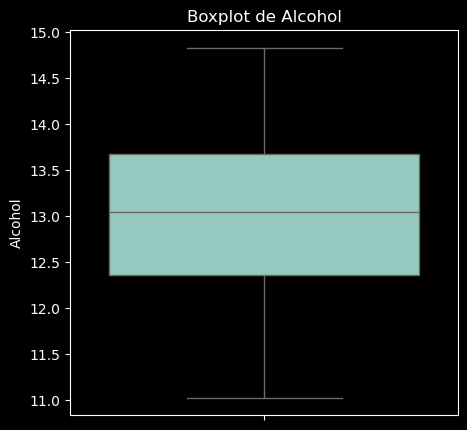

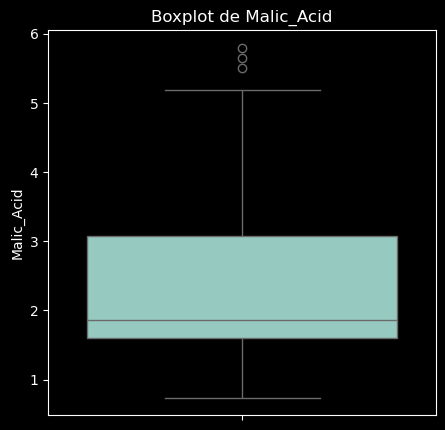

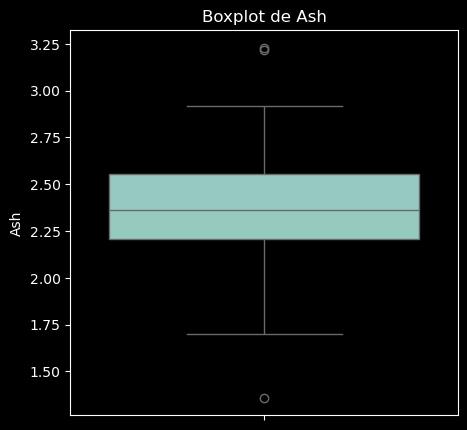

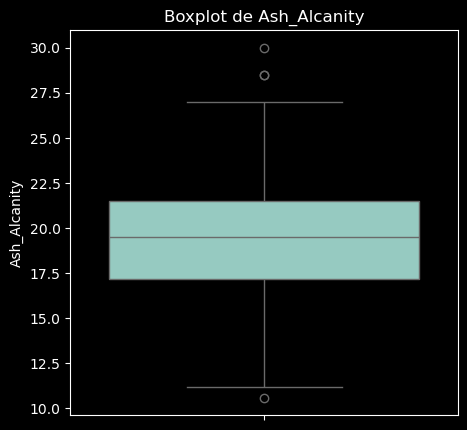

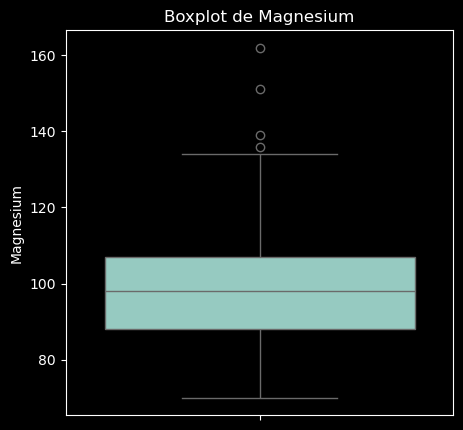

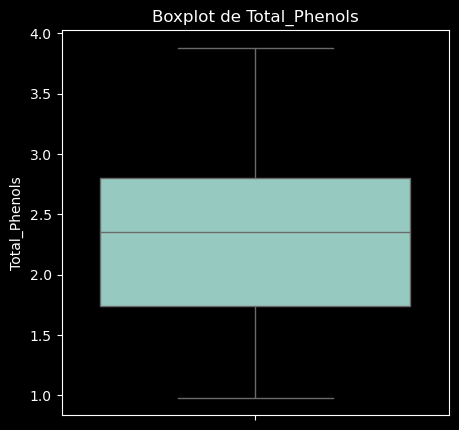

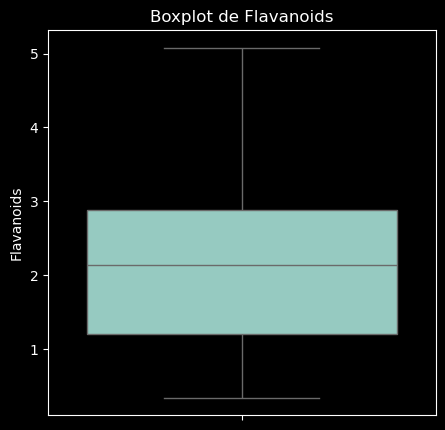

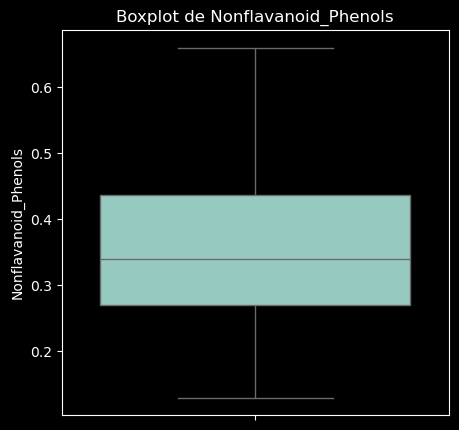

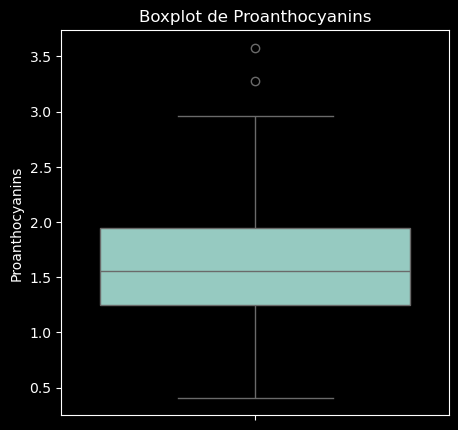

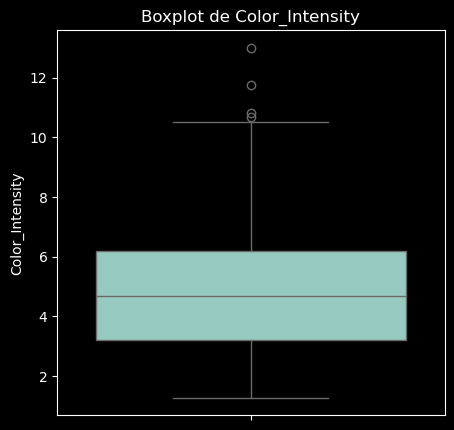

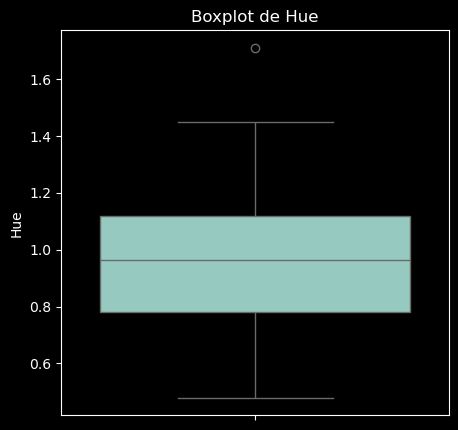

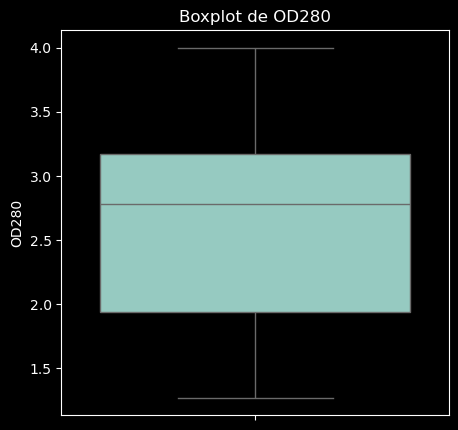

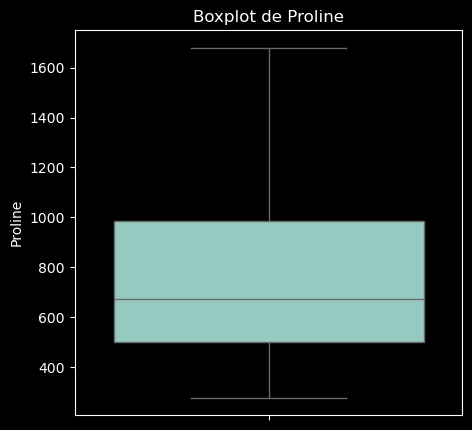

In [13]:
for column in wine.columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=wine[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

In [14]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1

inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR

outliers = wine[((wine < inferior) | (wine > superior)).any(axis=1)]
print(f'Cantidad de outliers que se van a excluir: {len(outliers)}')

Cantidad de outliers que se van a excluir: 17


In [15]:
wine = wine[~((wine < inferior) | (wine > superior)).any(axis=1)]

Habiendo una catidad  cantidad muy baja de outliers, se decide excluirlos

In [16]:
#excluimos los outliers
wine = wine[~((wine < inferior) | (wine > superior)).any(axis=1)]

# 3- EDA (Analisis Exploratorio de datos)

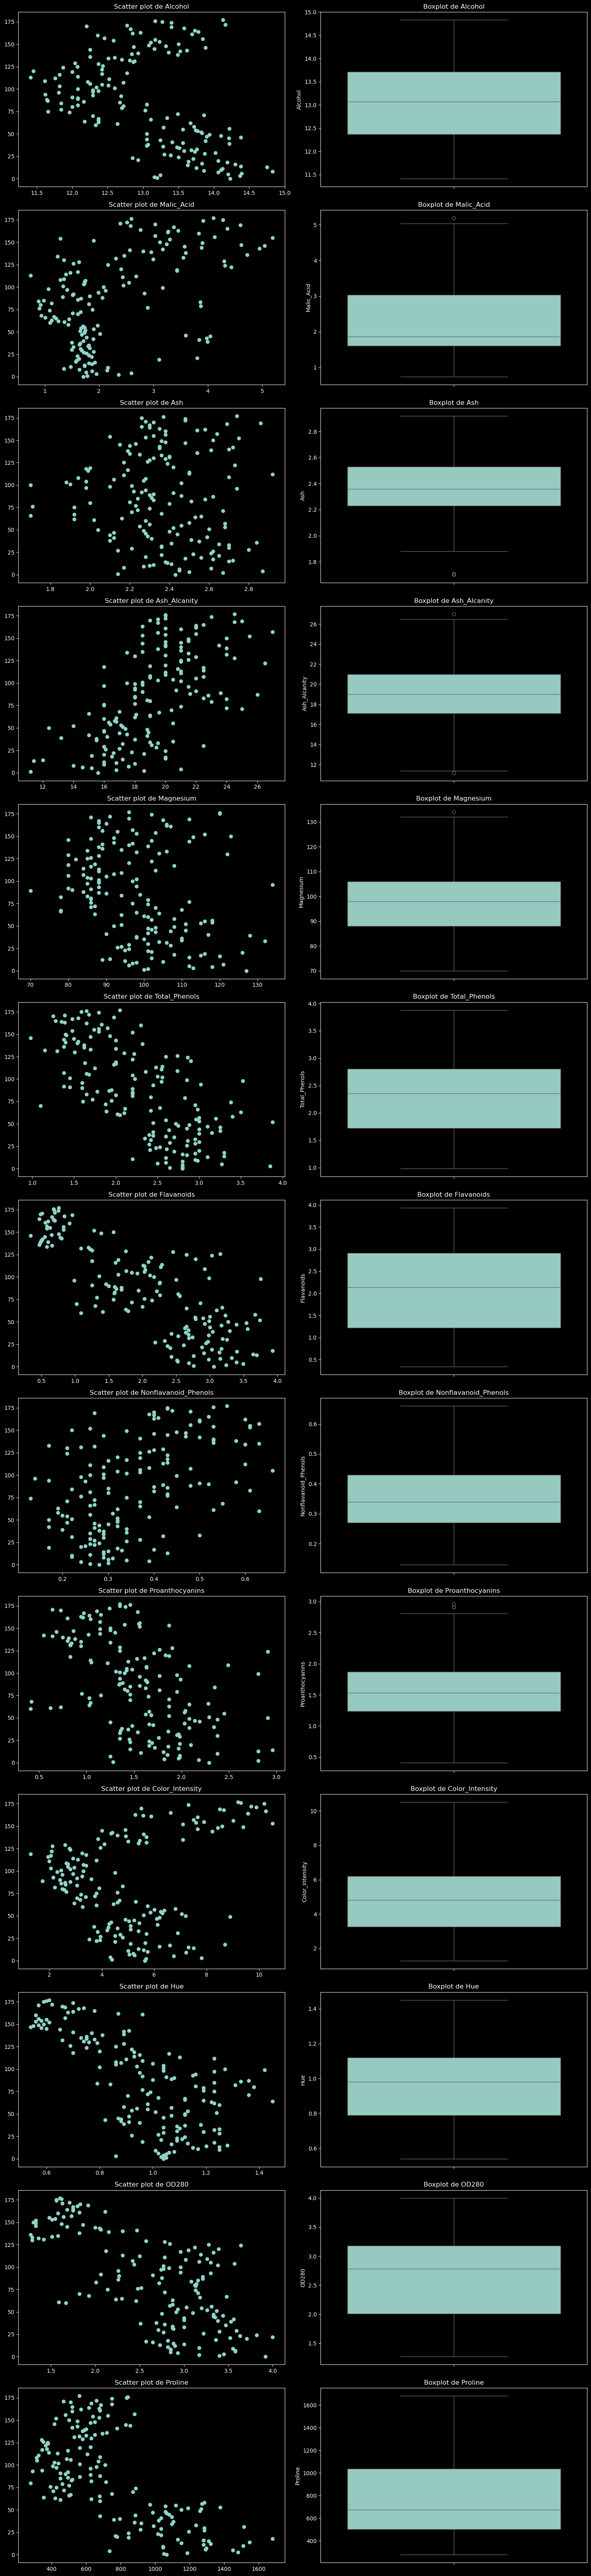

In [17]:
fig, axs = plt.subplots(len(wine.columns), 2, figsize=(15, len(wine.columns)*5))

for i, column in enumerate(wine.columns):
    
    axs[i, 0].scatter(wine[column], wine.index)
    axs[i, 0].set_title(f'Scatter plot de {column}')

    
    sns.boxplot(y=wine[column], ax=axs[i, 1], orient='v')
    axs[i, 1].set_title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

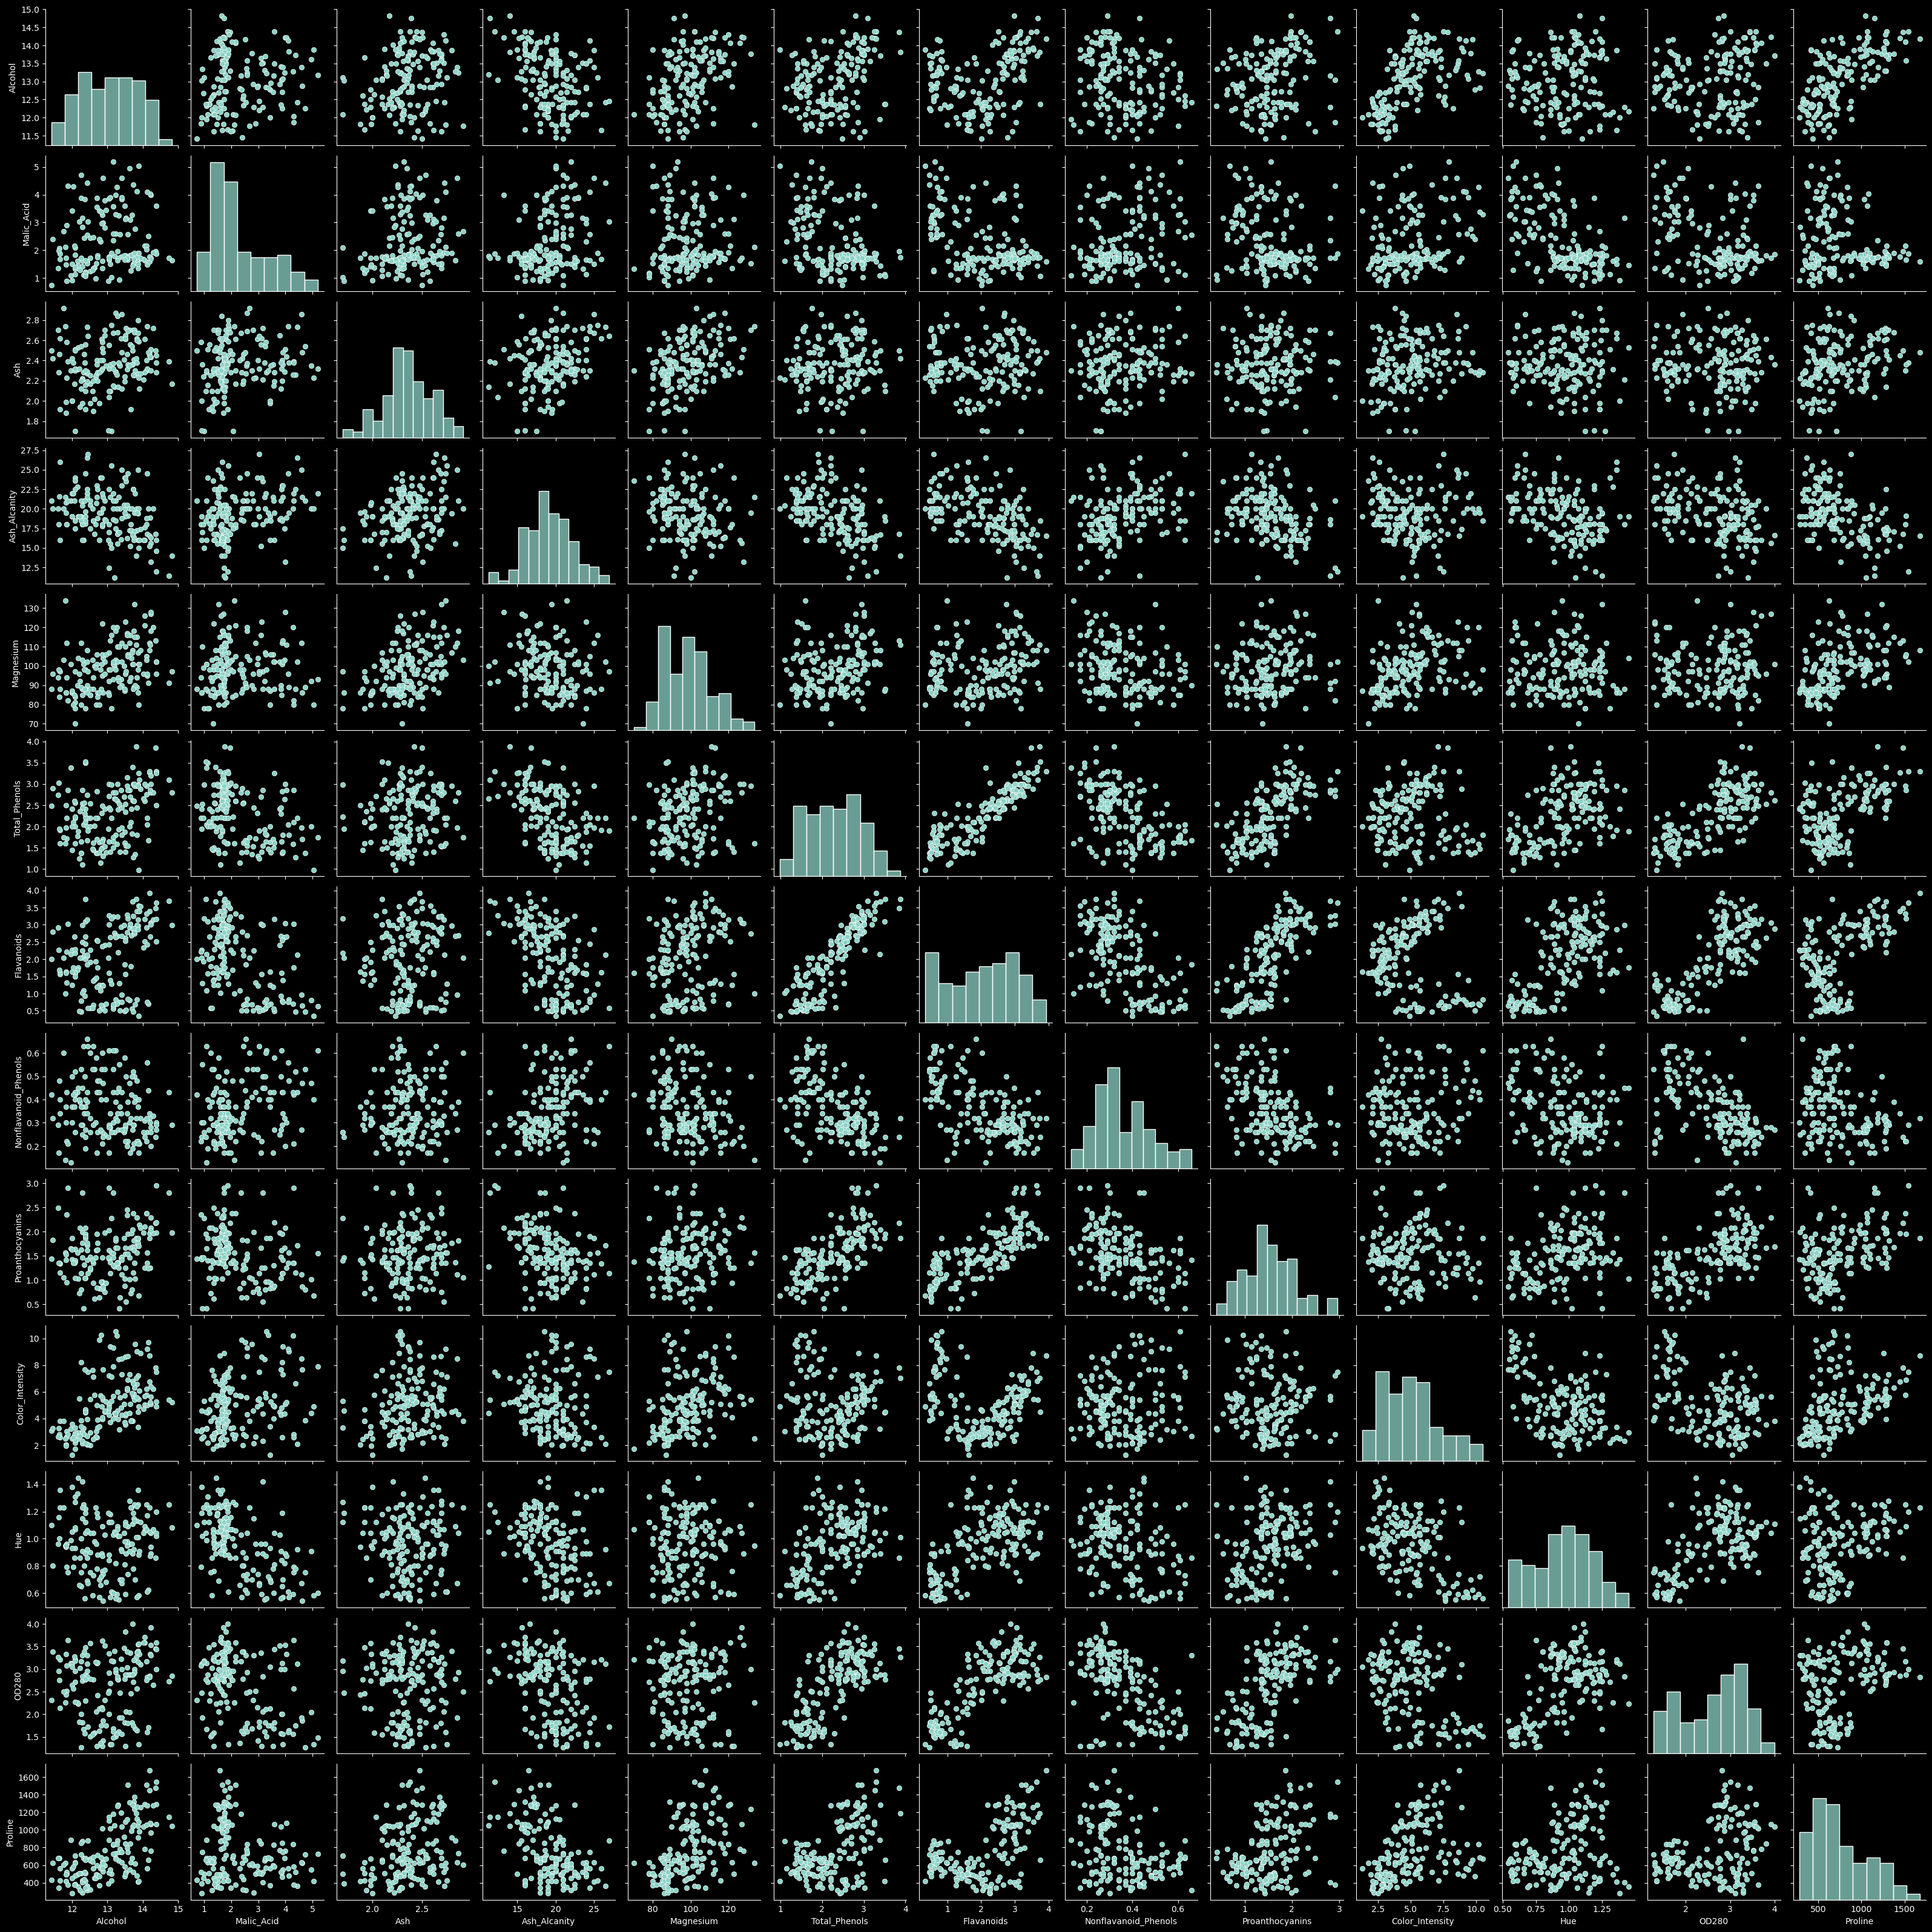

In [18]:
sns.pairplot(wine)
plt.show()

In [19]:
corr_matrix = wine.corr()
print(corr_matrix)

                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.087627  0.221731     -0.360546   0.418736   
Malic_Acid            0.087627    1.000000  0.176896      0.304459   0.021328   
Ash                   0.221731    0.176896  1.000000      0.308742   0.417566   
Ash_Alcanity         -0.360546    0.304459  0.308742      1.000000  -0.187005   
Magnesium             0.418736    0.021328  0.417566     -0.187005   1.000000   
Total_Phenols         0.341107   -0.365845  0.112113     -0.461560   0.247460   
Flavanoids            0.319613   -0.455470  0.051413     -0.514226   0.208853   
Nonflavanoid_Phenols -0.181695    0.297771  0.087043      0.339792  -0.241207   
Proanthocyanins       0.237687   -0.243416  0.032512     -0.336330   0.103294   
Color_Intensity       0.549755    0.285962  0.199414     -0.070142   0.339368   
Hue                   0.002908   -0.582334 -0.039670     -0.326072  -0.016604   
OD280                 0.1187

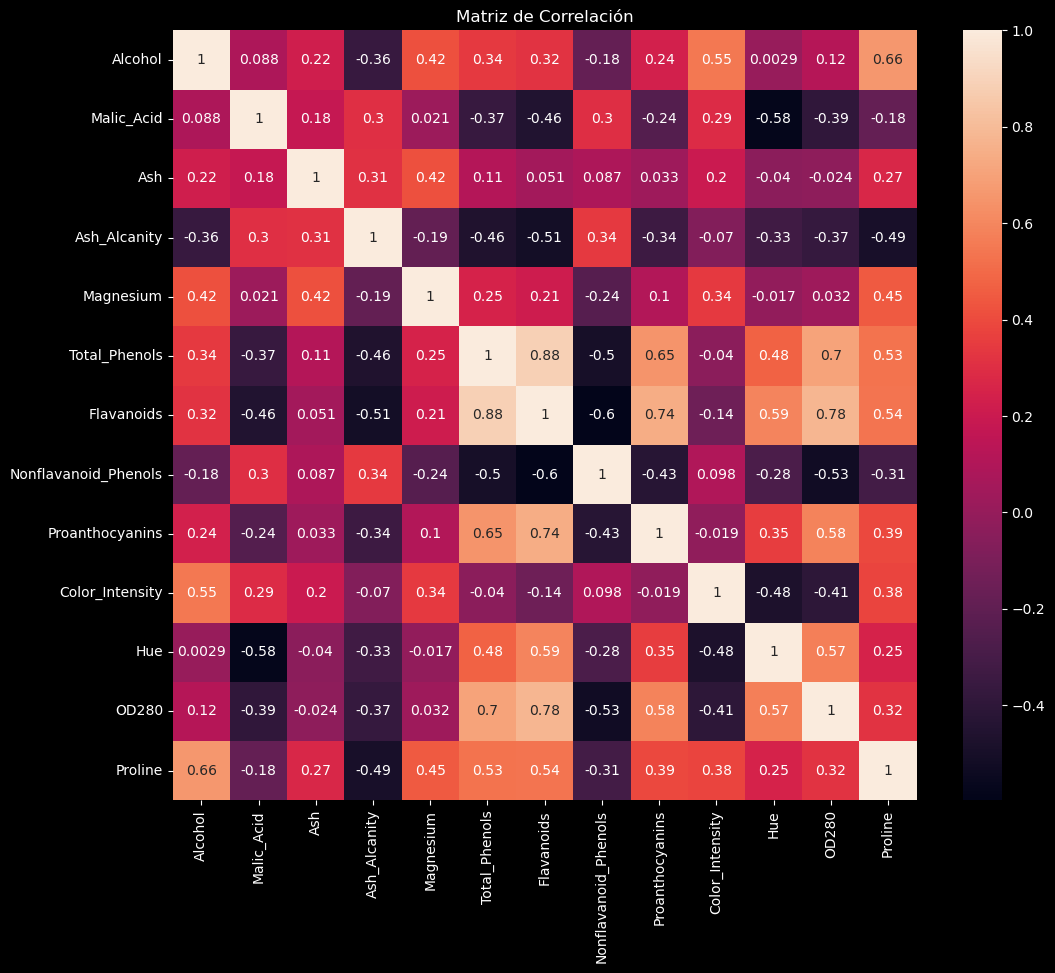

In [20]:
correlacion_matrix = wine.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.show()

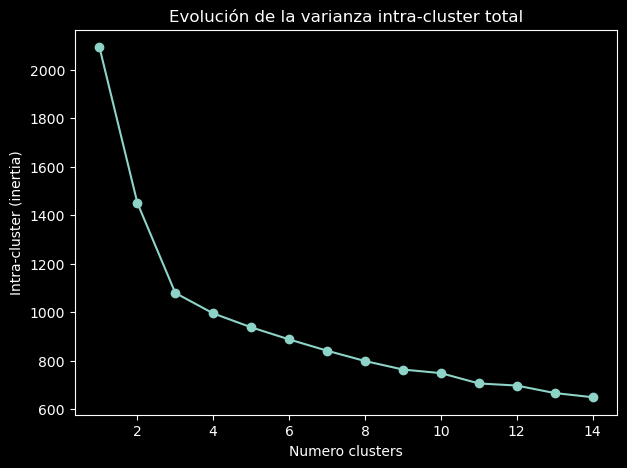

In [21]:
# escalado de los datos
wine_escala = scale(wine)
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=wine_escala)
# metodo elbow para identificar
rango_n_clusters = range(1, 15)
inertias = []

for n_clusters in rango_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 10, 
                        random_state = 200
                    )
    modelo_kmeans.fit(wine_escala)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(rango_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Numero clusters')
ax.set_ylabel('Intra-cluster (inertia)');

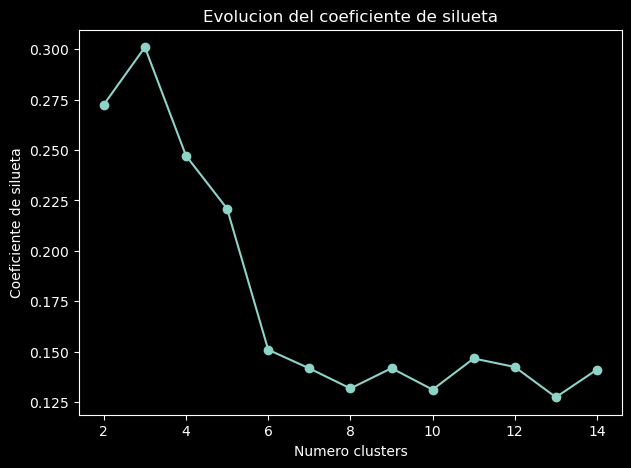

In [22]:
# metodo de la silueta
rango_n_clusters = range(2, 15) 
silhouette_scores = []

for n_clusters in rango_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 10,
        random_state = 200
    )
    modelo_kmeans.fit(wine_escala)
    silhouette_avg = silhouette_score(wine_escala, modelo_kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Graficar los resultados
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(rango_n_clusters, silhouette_scores, marker='o')
ax.set_title("Evolucion del coeficiente de silueta")
ax.set_xlabel('Numero clusters')
ax.set_ylabel('Coeficiente de silueta')
plt.show()

## Apartir de 3 cluster se estabiliza la variaza, podemos tomarlo como referencia para el numero de cluster en metodo del codo, en el metodo de la silueta se estabiliza tambien 3

In [23]:
# suponiendo que el número de clusters es 3
kmeans = KMeans(n_clusters=3, init='random', max_iter=200, n_init=10)
pred_y = kmeans.fit_predict(wine_escala)

score = silhouette_score(wine_escala, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.4f' % score)

Silhouetter Score: 0.3010


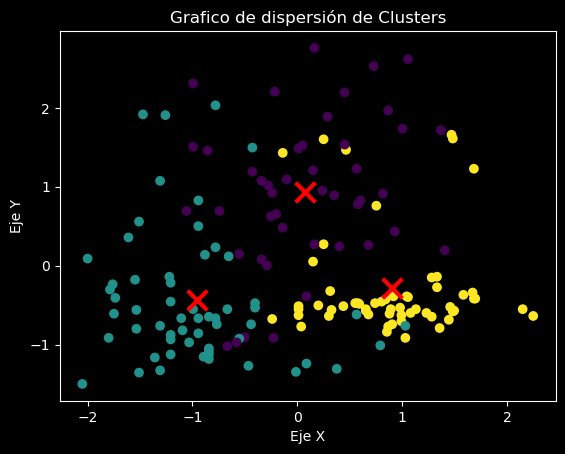

In [24]:
plt.scatter(wine_escala[:, 0], wine_escala[:, 1], c=kmeans.labels_)

# centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Grafico de dispersión de Clusters')
plt.show()

In [25]:
kmedoids = KMedoids(n_clusters=3, random_state=25)
kmedoids.fit(wine_escala)

# calcular el coeficiente de silueta  
score = silhouette_score(wine_escala, kmedoids.labels_, metric='euclidean')

print('Silhouetter Score: %.4f' % score)

Silhouetter Score: 0.2926


In [26]:
# metodo Hierarchical Clustering
Z = linkage(wine_escala, method='ward')
labels = fcluster(Z, t=3, criterion='maxclust')
score = silhouette_score(wine_escala, labels, metric='euclidean')
print('Silhouetter Score: %.4f' % score)

Silhouetter Score: 0.2927


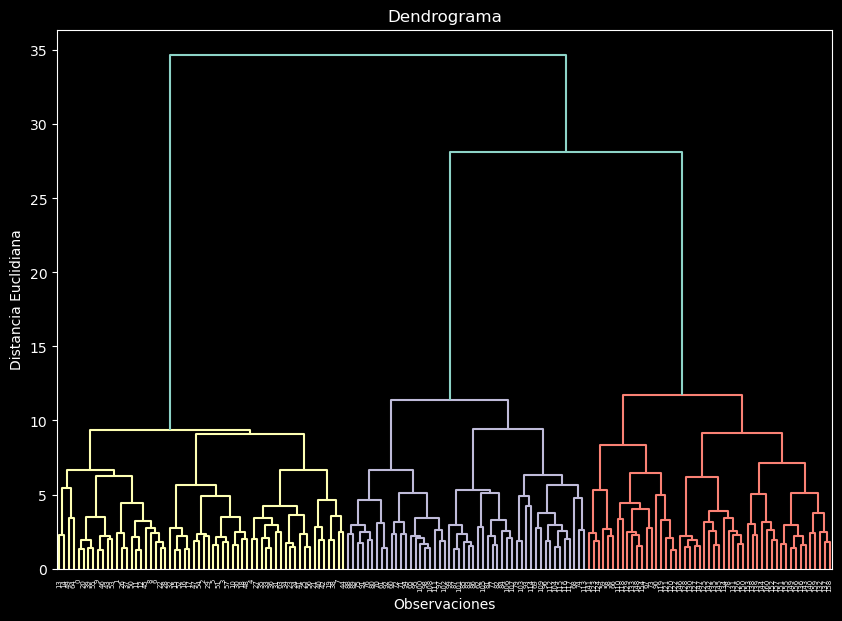

In [27]:
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Conclusion

Una vez que cargué los datos y entendí bien su estructura, procedí a realizar un análisis exploratorio. Verifiqué la existencia de valores nulos, NaN o vacíos. Luego, realicé un análisis de outliers y excluí aquellos que eran significativos. Posteriormente, analicé la correlación entre las variables y observé correlaciones de 0.88, 0.74, 0.78 y 0.65, lo que me dio una idea sobre los posibles agrupamientos.

Después, escalé los datos y apliqué el método de KMeans para identificar la cantidad de clusters que mejor se ajustaban a los datos. Utilicé el método de la silueta para verificar si el número de clusters era el correcto. Realicé un gráfico de dispersión de los clusters y también apliqué los métodos de KMedoids y jerárquico para comparar los coeficientes de silueta de cada uno.

Llegué a la conclusión de que el número óptimo de clusters es 3 y que el método de KMeans es el más adecuado para este problema, con un coeficiente de silueta de 0.3010. Aunque los otros métodos no quedaron muy lejos, con el jerárquico en 0.2927 y KMedoids en 0.2926.